
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [1]:

import numpy as np
import matplotlib.pyplot as plt


In [2]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it 
class StandardScalerManual:
    def fit(self, X):
        self.mean=np.mean(X,axis=0) # mean of data of X column-wise stored in self object
        self.std=np.std(X,axis=0) # standard deviation of data of X column-wise stored in self object
        self.std[self.std==0]=1e-8 # all values which were zero are set to a very low number to avoid error in division
    def transform(self, X):
        return (X-self.mean)/self.std # formula of standard scaling
    def fit_transform(self, X):
        self.fit(X) #calling the function
        return self.transform(X) #returning the final output
    

In [3]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda 
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr=lr #storing learning rate
        self.epochs=epochs #storing number of epochs
        self.l2_lambda=l2_lambda #storing value of alpha
        self.weights=None
        self.bias=None
    def fit(self, X, y):
        n_rows,n_columns=X.shape #defining rows and columns of X
        self.weights=np.zeros(n_columns) #zero array of size of column of X
        self.bias=0 #bias set initially to 0
        for i in range(self.epochs):
            y_predicted=np.dot(X,self.weights)+self.bias #formula of y predicted
            mse_w=(1/n_rows)*np.dot(X.T,(y_predicted-y)) #mean square error minimized w.r.t w
            mse_b=(1/n_rows)*np.sum(y_predicted-y) #mean square error minimized w.r.t b
            reg_l2=2*self.l2_lambda*self.weights #L2 regularization
            dw=mse_w+reg_l2 # change in weights regularized
            db=mse_b
            self.weights-=self.lr*dw #weight adjustment
            self.bias-=self.lr*db #bias adjustment
    def predict(self,X):
        return np.dot(X,self.weights)+self.bias 


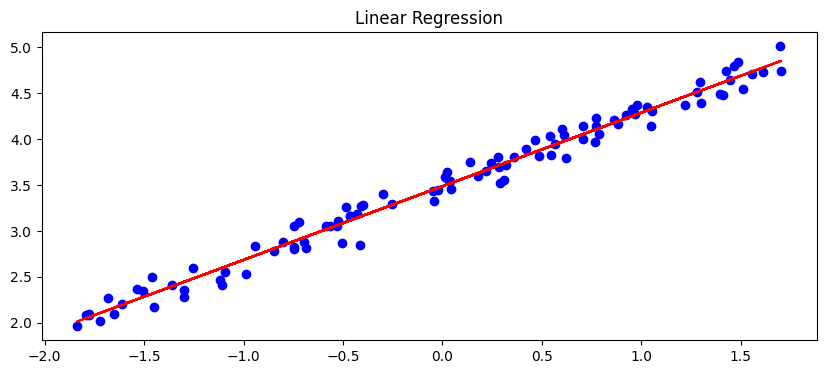

In [4]:
x=np.random.rand(100,1) #to generate 100 random values between 0 and 1
y=(3*x+2+np.random.randn(100,1)*0.1).flatten() #generated the ouput y=3x+2+noise
#performing linear regression
s=StandardScalerManual()
x=s.fit_transform(x)
a=LinearRegressionManual(lr=0.1,epochs=500)
a.fit(x,y)
p=a.predict(x)
plt.figure(figsize=(10,4))
plt.scatter(x,y,color='blue')
plt.plot(x,p,color='red')
plt.title('Linear Regression')
plt.show()

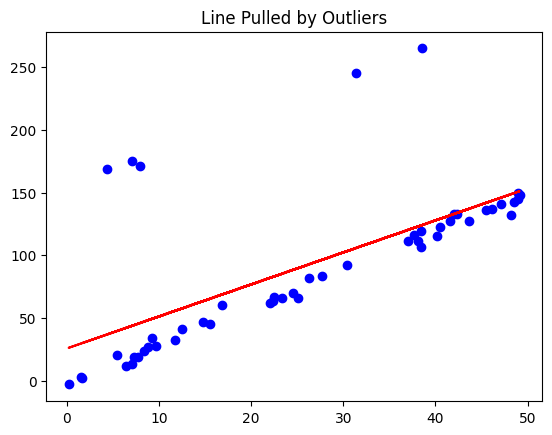

In [5]:
x=np.random.rand(50,1)*50 #generated 50 random numbers scaled upto 50
y=3*x.flatten()+np.random.randn(50)*5 #generated ouput of format y=3x+noise
y[45:]+=150 #created 5 outlier points to demonstrate faliure of linear regression
s=StandardScalerManual()
xs=s.fit_transform(x)
z=LinearRegressionManual(lr=0.01,epochs=1000)
z.fit(xs,y)
p=z.predict(xs)
plt.scatter(x,y,color='blue')
plt.plot(x,p,color='red')
plt.title('Line Pulled by Outliers')
plt.show()


## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [6]:

#Implement sigmoid function as told in the lectures 
def sigmoid(z):
    return 1/(1+np.exp(-z)) #formula of probability function(sigmoid)


In [7]:

#Implement Logistic Regression from scratch and here also add the regularizaation term 
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr=lr
        self.epochs=epochs
        self.l2_lambda=l2_lambda
        self.weights=None
        self.bias=None
        self.loss=[]
    def fit(self, X, y):
        n_rows,n_columns=X.shape #defining rows and columns of X
        self.weights=np.zeros(n_columns) #zero array of size of column of X
        self.bias=0 #bias set initially to 0
        self.loss=[]
        for i in range(self.epochs):
            linear_model=np.dot(X,self.weights)+self.bias #formula of y predicted
            y_predicted=sigmoid(linear_model)
            mse_w=(1/n_rows)*np.dot(X.T,(y_predicted-y)) #mean square error minimized w.r.t w
            mse_b=(1/n_rows)*np.sum(y_predicted-y) #mean square error minimized w.r.t b
            reg_l2=2*self.l2_lambda*self.weights #L2 regularization
            dw=mse_w+reg_l2 # change in weights regularized
            db=mse_b
            self.weights-=self.lr*dw #weight adjustment
            self.bias-=self.lr*db #bias adjustment
            epsilon=1e-15
            y_predicted=np.clip(y_predicted,epsilon,1-epsilon) #clippng predicted y to evade log(0)
            n=len(y) #length of training data array
            loss=-(1/n)*np.sum(y*np.log(y_predicted)+(1-y)*np.log(1-y_predicted)) #loss
            l2_penalty=self.l2_lambda*np.sum(self.weights**2) #penalty applied on weights
            current_loss=loss+l2_penalty
            self.loss.append(current_loss) #storing losses in self
            if i%100==0:
                print(f"Epoch {i}: Loss {current_loss:.4f}")
    def predict_proba(self, X):
        linear_model=np.dot(X,self.weights)+self.bias
        return sigmoid(linear_model) #probability of linear model(between 0 to 1)
    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int) #if probability>=0.5 then 1 otherwise 0


Epoch 0: Loss 0.6931
Epoch 100: Loss 0.2881
Epoch 200: Loss 0.2217
Epoch 300: Loss 0.1907
Epoch 400: Loss 0.1716
Epoch 500: Loss 0.1583
Epoch 600: Loss 0.1483
Epoch 700: Loss 0.1403
Epoch 800: Loss 0.1338
Epoch 900: Loss 0.1283


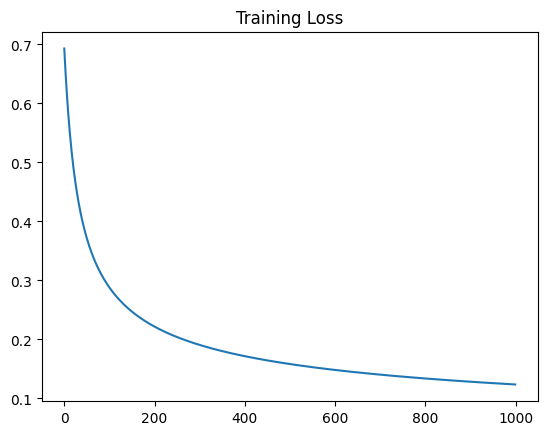

1.0


In [8]:
x=np.random.randn(200,2) #generated 200 random values with 2 columns
y=np.array([1 if i[0]+i[1]>0 else 0 for i in x]) #generated binary labels is sum in both columns>0 then 1 else 0(notice they will be linearly separable)
#applied logistic regression
s=StandardScalerManual()
x=s.fit_transform(x)
b=LogisticRegressionManual(lr=0.1,epochs=1000)
b.fit(x,y)
plt.plot(b.loss)
plt.title('Training Loss')
plt.show()
p=b.predict(x)
acc=np.mean(p==y) #checking what fraction of p actually match y
print(acc)

Epoch 0: Loss 0.6931
Epoch 100: Loss 0.6918
Epoch 200: Loss 0.6918
Epoch 300: Loss 0.6918
Epoch 400: Loss 0.6918
Epoch 500: Loss 0.6918
Epoch 600: Loss 0.6918
Epoch 700: Loss 0.6918
Epoch 800: Loss 0.6918
Epoch 900: Loss 0.6918


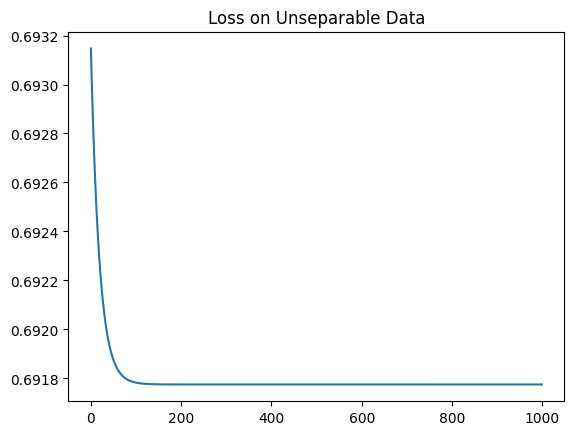

0.535


In [9]:
x=np.random.randn(200,2)
y=np.random.randint(0,2,200)# difference here is that applied binary labels at random which disables any pattern causing the accuracy to drop highly
s=StandardScalerManual()
xs=s.fit_transform(x)
w=LogisticRegressionManual(lr=0.1,epochs=1000)
w.fit(xs,y)
plt.plot(w.loss)
plt.title('Loss on Unseparable Data')
plt.show()
print(np.mean(w.predict(xs)==y))


## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [10]:
from sklearn.cluster import KMeans #imported kmeans to perform clustering
def kmeans_matrix(M, k, max_iters=100):
    flat_M=M.reshape(-1,1) #just flattening the matrix M as cluster is to be applied on individual elements
    kmeans=KMeans(n_clusters=k,max_iter=max_iters,n_init=10) #max_iteration set to 100 and n_init set to 10 different seed values
    kmeans.fit(flat_M) #clustering calculations(finding centroid and labels)
    centroids=kmeans.cluster_centers_.flatten() #cluster centres converted to a 1D array
    assignment_table=kmeans.labels_.reshape(M.shape) #1D array again converted back to matrix M shape(this was done to avoid loop)
    cookbook={i: [] for i in range(k)} #empty lists created for keys 0 to (k-1) in dictionary
    rows,cols=M.shape #value of row and column of matrix M
    for r in range(rows):
        for c in range(cols):
            cookbook[assignment_table[r,c]].append((r,c)) #the value at (r,c) in assignment_table is key and (r,c) is its value
    return assignment_table,cookbook,centroids


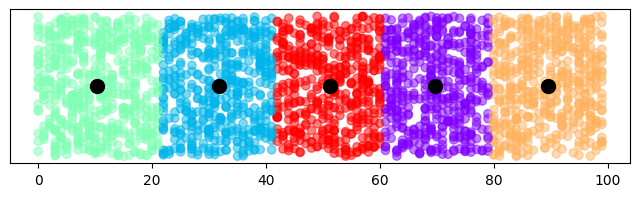

In [11]:
M=np.random.randint(0,100,(50,50)) #generate 50*50 matrix with random integers between 0 to 99
k=5 #number of clusters
#applying k-means
a,cb,c=kmeans_matrix(M,k)
f=M.flatten()
l=a.flatten()
j=np.random.rand(len(f)) #creating y-values which spread out
plt.figure(figsize=(8,2))
plt.scatter(f,j,c=l,cmap='rainbow',alpha=0.5)
plt.scatter(c,[0.5]*len(c),c='black',s=100,marker='o')
plt.yticks([])
plt.show()

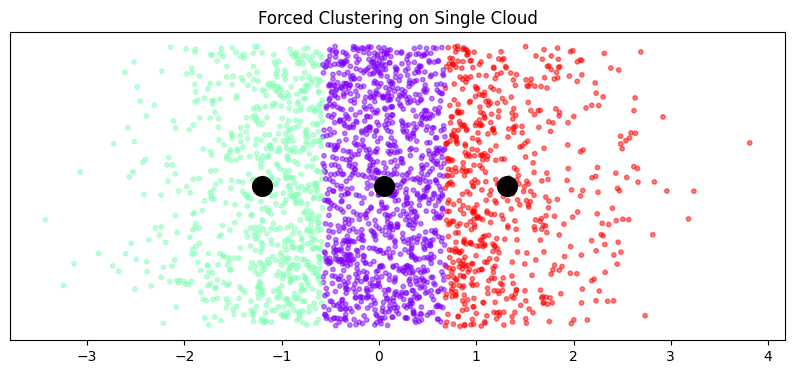

In [12]:
#did this to show that though data is best represented by 1 cluster centered at zero k-means forces it to break into 3 clusters giving wrong insights
M=np.random.randn(50,50) #this will generate a data which is uniformly distributed(bell curve type structure)
k=3 # no. of clusters
#applied k-means
a,cb,c=kmeans_matrix(M,k)
f=M.flatten()
j=np.random.rand(len(f)) #generated random y-values which spread out
l=a.flatten()
plt.figure(figsize=(10,4))
plt.scatter(f,j,c=l,cmap='rainbow',alpha=0.5,s=10)
plt.scatter(c,[0.5]*len(c),c='black',s=200,marker='o')
plt.yticks([])
plt.title('Forced Clustering on Single Cloud')
plt.show()


## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
